In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.learning_curve import learning_curve
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

%matplotlib inline

**Challenge 1**

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [53]:
df1 = pd.read_csv("votes.txt")
df1 = df1.replace('y',1)
df1 = df1.replace('n',0)
df1 = df1.replace('?',np.nan)
df1 = df1.replace(np.nan, df1.mean())
df1['party'] = df1.party.replace('republican', 1)
df1['party'] = df1.party.replace('democrat', 0)
df1.head()

,party,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,1,0.00000,1,0,1.000000,1.000000,1,0,0,0,1,0.362319,1.000000,1,1,0,1.000000
1,1,0.00000,1,0,1.000000,1.000000,1,0,0,0,0,0.000000,1.000000,1,1,0,0.812689
2,0,0.44208,1,1,0.417453,1.000000,1,0,0,0,0,1.000000,0.000000,1,1,0,0.000000
3,0,0.00000,1,1,0.000000,0.504762,1,0,0,0,0,1.000000,0.000000,1,0,0,1.000000
4,0,1.00000,1,1,0.000000,1.000000,1,0,0,0,0,1.000000,0.423267,1,1,1,1.000000


**Challenge 2**

Split the data into a test and training set. Use this function:

```
from sklearn.cross_validation import train_test_split
```

In [54]:
y, X = dmatrices('party ~ v1+v2+v3+v4+v5+v6+v7+v8+v9+v10+v11+v12+v13+v14+v15+v16', data=df1, return_type='matrix')

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=7)

**Challenge 3**

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

In [55]:
y_train = y_train.ravel()
y_test = y_test.ravel()

def knn(k):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train, y_train)
    return accuracy_score(y_test, knn.predict(x_test))
for i in range(1,21):
    print i, knn(i)

1 0.94495412844
2 0.954128440367
3 0.94495412844
4 0.94495412844
5 0.94495412844
6 0.954128440367
7 0.926605504587
8 0.94495412844
9 0.94495412844
10 0.94495412844
11 0.926605504587
12 0.926605504587
13 0.935779816514
14 0.94495412844
15 0.935779816514
16 0.935779816514
17 0.935779816514
18 0.935779816514
19 0.935779816514
20 0.935779816514


>k values of 2 and 6 give the highest accuracy score

**Challenge 4**

Make a similar model but with `LogisticRegression` instead, calculate test accuracy.

In [56]:
def log_reg():
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    return accuracy_score(y_test, log_reg.predict(x_test))
print "Logistic Regression test accuracy:", log_reg()

Logistic Regression test accuracy: 0.954128440367


**Challenge 5**

Make a bar graph of democrats and republicans. How many of each are there?

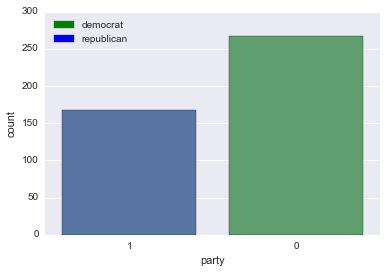

0    267
1    168
dtype: int64


In [57]:
sns.countplot(df1.party)
democrat = mpatches.Patch(color='green', label='democrat') 
republican = mpatches.Patch(color='blue', label='republican')
plt.legend(handles=[democrat, republican], loc = 'best')
plt.show()

print df1.party.value_counts()

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

In [58]:
def dem(x):
    return [0] * len(x)
y_pred_dem = dem(x_test)

def dem_acc():
    return accuracy_score(y_test, y_pred_dem)
print "Accuracy always predicting democrat:", dem_acc()

Accuracy always predicting democrat: 0.651376146789


Do the same with predicting 'republican' all the time and measure its accuracy.

In [59]:
def rep(x):
    return [1] * len(x)
y_pred_rep = rep(x_test)

def rep_acc():
    return accuracy_score(y_test, y_pred_rep)
print "Accuracy always predicting Republican:", rep_acc()

Accuracy always predicting Republican: 0.348623853211


**Challenge 6**

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

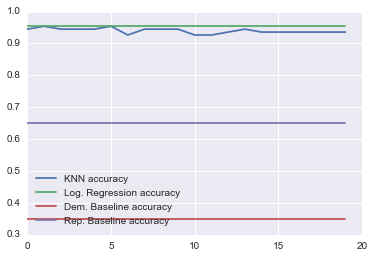

In [60]:
headers = ['KNN', 'LogReg', 'JustDem', 'JustRep']
data = []
def accuracies(k):
    knn_acc = knn(k)
    log = log_reg()
    rep = rep_acc()
    dem = dem_acc()
    
    info_dict = dict(zip(headers, [knn_acc, log, rep, dem]))
    data.append(info_dict)
    
for i in range(1,21):
    accuracies(i)
accuracies_df = pd.DataFrame(data)

plt.plot(accuracies_df.KNN, label='KNN accuracy')
plt.plot(accuracies_df.LogReg, label='Log. Regression accuracy')
plt.plot(accuracies_df.JustDem, label='Dem. Baseline accuracy')
plt.plot(accuracies_df.JustRep, label='Rep. Baseline accuracy')
plt.legend(loc = 'lower left')
plt.show()

**Challenge 7**

Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:

```
from sklearn.learning_curve import learning_curve
```

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : )
Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```

Before plotting `m` vs `train_cv_err` and `m` vs `test_cv_err`, where `train_err` and `test_err` are the vectors returned by the learning curve function. The `np.mean(...., axis=1)` means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

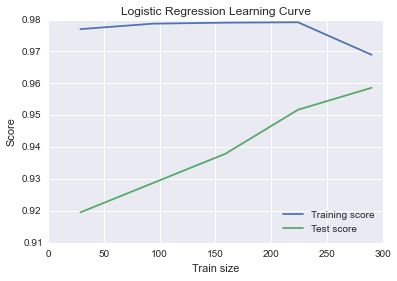

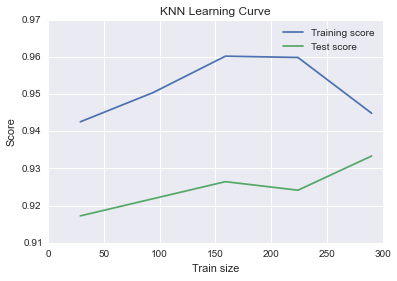

In [61]:
train_sizes, train_score, test_score = learning_curve(LogisticRegression(), X, y.ravel(), scoring = 'accuracy')
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(test_score, axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_cv_score, label = "Training score")
ax.plot(train_sizes,test_cv_score, label = "Test score")
plt.legend(loc = 'best')
plt.title('Logistic Regression Learning Curve')
ax.set_xlabel("Train size")
ax.set_ylabel("Score")
plt.show()

train_sizes, train_score, test_score = learning_curve(KNeighborsClassifier(6), X, y.ravel(), scoring = 'accuracy')
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(test_score, axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_cv_score, label = "Training score")
ax.plot(train_sizes,test_cv_score, label = "Test score")
plt.legend(loc = 'best')
plt.title('KNN Learning Curve')
ax.set_xlabel("Train size")
ax.set_ylabel("Score")
plt.show()

**Challenge 8**

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes

```
from sklearn.naive_bayes import GaussianNB
```

SVM (Support Vector Machine) Classifier

```
from sklearn.svm import SVC
```

Decision Tree

```
from sklearn.tree import DecisionTreeClassifier
```

Random Forest

```
from sklearn.ensemble import RandomForestClassifier
```

In [62]:
gb = GaussianNB().fit(x_train, y_train)
print "Gaussian Naive Bayes test accuracy:", accuracy_score(y_test, gb.predict(x_test))

svm = SVC().fit(x_train, y_train)
print "SVM (Support Vector Machine) Classifier test accuracy:", accuracy_score(y_test, svm.predict(x_test))

dtc = DecisionTreeClassifier().fit(x_train, y_train)
print "Decision Tree test accuracy:", accuracy_score(y_test, dtc.predict(x_test))

rf = RandomForestClassifier().fit(x_train, y_train)
print "Random Forest test accuracy:", accuracy_score(y_test, rf.predict(x_test))

Gaussian Naive Bayes test accuracy: 0.94495412844
SVM (Support Vector Machine) Classifier test accuracy: 0.954128440367
Decision Tree test accuracy: 0.94495412844
Random Forest test accuracy: 0.94495412844


**Challenge 9**

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

```
from sklearn.cross_validation import cross_val_score
```

Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [63]:
knn_cv_scores = cross_val_score(KNeighborsClassifier(6), X, y.ravel(), scoring = 'accuracy')
print "KNN cross validation score:", knn_cv_scores.mean()

log_reg_cv_scores = cross_val_score(LogisticRegression(), X, y.ravel(), scoring = 'accuracy')
print "Logisitic Regression cross validation score:", log_reg_cv_scores.mean()

gb_cv_scores = cross_val_score(GaussianNB(), X, y.ravel(), scoring = 'accuracy')
print "Gaussian Naive Bayes cross validation score:", gb_cv_scores.mean()

svm_cv_scores = cross_val_score(SVC(), X, y.ravel(), scoring = 'accuracy')
print "SVM (Support Vector Machine) Classifier cross validation score:", svm_cv_scores.mean()

dt_cv_scores = cross_val_score(DecisionTreeClassifier(), X, y.ravel(), scoring = 'accuracy')
print "Decision Tree cross validation score:", dt_cv_scores.mean()

rf_cv_scores = cross_val_score(RandomForestClassifier(), X, y.ravel(), scoring = 'accuracy')
print "Random Forest cross validation score:", rf_cv_scores.mean()

KNN cross validation score: 0.933333333333
Logisitic Regression cross validation score: 0.958620689655
Gaussian Naive Bayes cross validation score: 0.931034482759
SVM (Support Vector Machine) Classifier cross validation score: 0.954022988506
Decision Tree cross validation score: 0.947126436782
Random Forest cross validation score: 0.96091954023


**Challenge 10**

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [64]:
df2 = pd.read_csv("votes.txt")
df2 = df2.replace('y',1)
df2 = df2.replace('n',0)
df2['party'] = df2.party.replace('republican', 1)
df2['party'] = df2.party.replace('democrat', 0)
df2 = df2.replace('?',np.nan)
df2 = df2.replace(np.nan,dict(df2.mode()))
df2.head()

,party,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16
0,1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [65]:
y2, X2 = dmatrices('v1 ~ v2+v3+v4+v5+v6+v7+v8+v9+v10+v11+v12+v13+v14+v15+v16', data=df2, return_type='matrix')
y2 = y2.ravel()

x_train2, x_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.25, random_state=7)

def knn(k):
    knn = KNeighborsClassifier(k)
    knn.fit(x_train2, y_train2)
    return accuracy_score(y_test2, knn.predict(x_test2))
for i in range(1,21):
    print i, knn(i)
    
knn_cv_scores = cross_val_score(KNeighborsClassifier(19), X2, y2.ravel(), scoring = 'accuracy')
print "\nKNN cross validation score:", knn_cv_scores.mean()

1 0.660550458716
2 0.614678899083
3 0.651376146789
4 0.706422018349
5 0.642201834862
6 0.743119266055
7 0.706422018349
8 0.688073394495
9 0.688073394495
10 0.724770642202
11 0.669724770642
12 0.669724770642
13 0.688073394495
14 0.688073394495
15 0.697247706422
16 0.678899082569
17 0.697247706422
18 0.697247706422
19 0.733944954128
20 0.724770642202

KNN cross validation score: 0.661884173971


**Challenge 11**

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

In [66]:
df3 = pd.read_csv("2013_movies.csv")
df3['Runtime_bins'] = (df3.Runtime > 100).astype(int)
df3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Runtime_bins
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,0
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

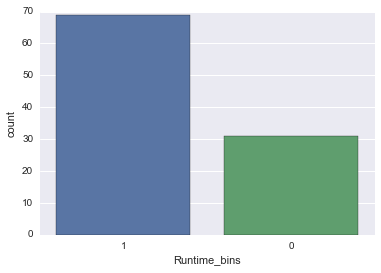

1    69
0    31
dtype: int64


In [67]:
sns.countplot(df3.Runtime_bins)
plt.show()
print df3.Runtime_bins.value_counts()

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

In [68]:
y3, X3 = dmatrices('Runtime_bins ~ Rating', data=df3, return_type='matrix')
y3 = y3.ravel()

x_train3, x_test3, y_train3, y_test3 = train_test_split(
    X3, y3, test_size=0.25, random_state=7)

movie_knn = KNeighborsClassifier()
movie_knn.fit(x_train3, y_train3)
print "KNN accuracy predicting if runtime will be over 100 min:", accuracy_score(y_test3, movie_knn.predict(x_test3))

KNN accuracy predicting if runtime will be over 100 min: 0.52


In [69]:
movie_log_reg = LogisticRegression()
movie_log_reg.fit(x_train3, y_train3)
print "Logistic Regression accuracy predicting if runtime will be over 100 min:",accuracy_score(y_test3, movie_log_reg.predict(x_test3))

Logistic Regression accuracy predicting if runtime will be over 100 min: 0.72


Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

In [70]:
def runtime(x):
    return [1] * len(x)
y_pred_runtime = runtime(x_test3)

def runtime_acc():
    return accuracy_score(y_test3, y_pred_runtime)
print "Baseline predictor accuracy:", runtime_acc()

Baseline predictor accuracy: 0.76


How much better do KNN and logistic regression do versus the baseline?

>Neither model does better than the dummy baseline predictor.

**Challenge 12**

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: [Haberman Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival)

In [71]:
df4 = pd.read_csv("cancer.txt")
df4.head()

,age,year_of_op,pos_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


 * What is the average and standard deviation of the age of all of the patients?

In [72]:
print "Average age of all patients:", df4.age.mean()
print "Standard deviation:", df4.age.std()

Average age of all patients: 52.4575163399
Standard deviation: 10.8034523493


 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [73]:
print "Mean age by", df4.groupby('survival_status').age.mean()
print "\nStandard deviation of age by", df4.groupby('survival_status').age.std()

Mean age by survival_status
1    52.017778
2    53.679012
Name: age, dtype: float64

Standard deviation of age by survival_status
1    11.012154
2    10.167137
Name: age, dtype: float64


 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

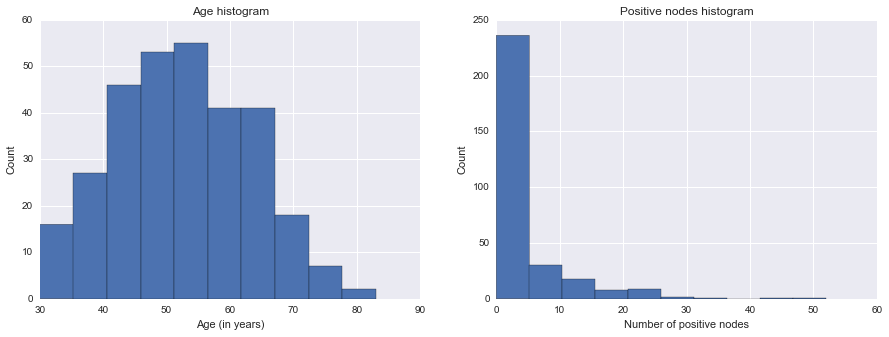

In [74]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.hist(df4.age)
plt.title('Age histogram')
plt.xlabel('Age (in years)')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.hist(df4.pos_nodes)
plt.title('Positive nodes histogram')
plt.xlabel('Number of positive nodes')
plt.ylabel('Count')
plt.show()

 * What is the earliest year of surgery in this dataset?

In [75]:
print "Earliest surgery was in", 1900 + min(df4.year_of_op)

Earliest surgery was in 1958


 * What is the most recent year of surgery?

In [76]:
print "Most recent surgery was in", 1900 + max(df4.year_of_op)

Most recent surgery was in 1969


 * Use logistic regression to predict survival after 5 years. How well does your model do?

In [81]:
y4 = df4.survival_status.values
X4 = df4.copy()
X4 = X4.drop(X4.columns[3], axis=1)

x_train4, x_test4, y_train4, y_test4 = train_test_split(
    X4, y4, test_size=0.25, random_state=7)

survival = LogisticRegression()
survival.fit(x_train4, y_train4)
print "Logistic Regression accuracy score:", accuracy_score(y_test4, survival.predict(x_test4))

Logistic Regression accuracy score: 0.727272727273


 * What are the coefficients of logistic regression? Which features affect the outcome how?

In [78]:
coefs = pd.DataFrame(survival.coef_)
coefs.columns = X4.columns
coefs

,age,year_of_op,pos_nodes
0,0.019199,-0.037126,0.113621


In [79]:
print "Age effect:", math.exp(coefs.age.values)
print "Year of operation effect:", math.exp(coefs.year_of_op.values)
print "Number of positive nodes effect:", math.exp(coefs.pos_nodes.values)

Age effect: 1.01938416063
Year of operation effect: 0.963554584847
Number of positive nodes effect: 1.12032714681


>It appears that the number of positive nodes effects the outcome the most.  An additional positive node adds 12% to the probability of death.

 * Draw the learning curve for logistic regression in this case.

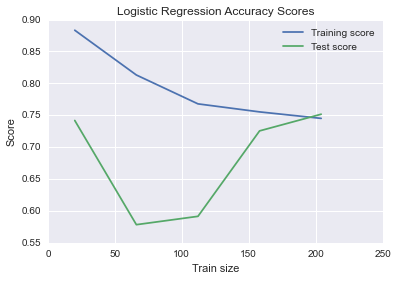

In [80]:
train_sizes, train_score, test_score = learning_curve(LogisticRegression(), X4, y4, scoring = 'accuracy')
train_cv_score = np.mean(train_score, axis=1)
test_cv_score = np.mean(test_score, axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_cv_score, label = "Training score")
ax.plot(train_sizes,test_cv_score, label = "Test score")
plt.legend(loc = 'best')
plt.title('Logistic Regression Accuracy Scores')
ax.set_xlabel("Train size")
ax.set_ylabel("Score")
plt.show()